In [7]:
import jax
import numpy as np
jax.config.update('jax_platform_name', 'cpu')
import jax.numpy as jnp
import matplotlib.pyplot as plt
import ott
from ott.geometry import costs, pointcloud
from ott.problems.linear import linear_problem
from ott.solvers.linear import sinkhorn
import jax.numpy as jnp

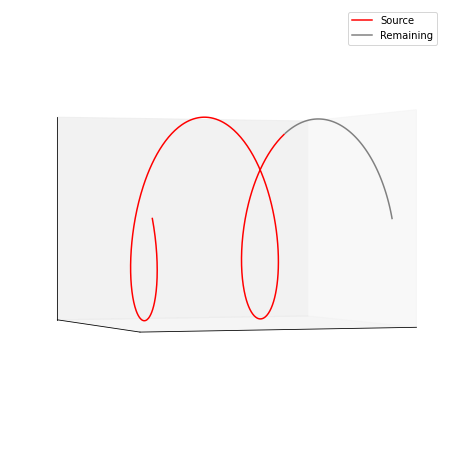

In [8]:
# Parameters
n_turns = 2# Number of turns in the spiral
n_points_per_turn = 300  # Number of points per turn
theta_max = 2 * np.pi * n_turns  # Maximum angle for the spiral
radius = 0.5  # Constant radius of the spiral

# Generate angles along the circular direction
theta = np.linspace(0, theta_max, n_turns * n_points_per_turn)

# Generate height along the non-circular direction
x = np.linspace(0, 5, len(theta))

# Parametric equations for spiral with constant radius along x-axis
y = radius * np.cos(theta)
z = radius * np.sin(theta)

target = jnp.concatenate((x[:500][:,None], y[:500][:,None], z[:500][:,None]), axis=1)
non_target = jnp.concatenate((x[500:][:,None], y[500:][:,None], z[500:][:,None]), axis=1)
source = jnp.concatenate((x[100:][:,None], y[100:][:,None], z[100:][:,None]), axis=1)
non_source = jnp.concatenate((x[:100][:,None], y[:100][:,None], z[:100][:,None]), axis=1)



# Plot the 3D spiral with adjusted viewing angle
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(source[:,0], source[:,1], source[:,2], 'r-', label='Source')
ax.plot(non_source[:,0], non_source[:,1], non_source[:,2], 'gray', label='Remaining')

#ax.plot(x, y, z, label='3D Spiral')
ax.view_init(elev=0, azim=70)  # Adjust the viewing angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

ax.grid(False)
plt.show()


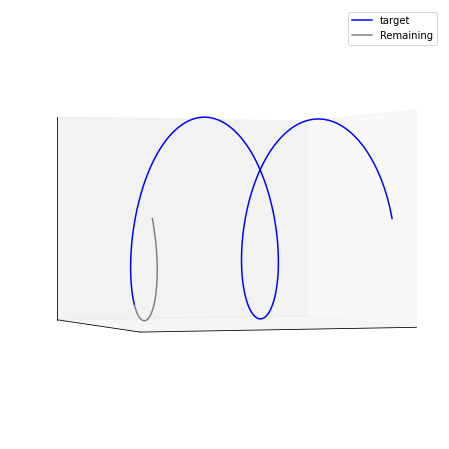

In [9]:
n_points_first_third = len(x) // 3

# Plot the 3D spiral with adjusted viewing angle
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(target[:,0], target[:,1], target[:,2], 'blue', label='target')
ax.plot(non_target[:,0], non_target[:,1], non_target[:,2], 'gray', label='Remaining')

#ax.plot(x, y, z, label='3D Spiral')
ax.view_init(elev=0, azim=70)  # Adjust the viewing angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')

ax.grid(False)
plt.show()


In [10]:
geom = pointcloud.PointCloud(source, target, scale_cost='mean', epsilon=1e-3)

In [11]:
ot_prob = linear_problem.LinearProblem(geom)
# Create a Sinkhorn solver
solver = sinkhorn.Sinkhorn()
# Solve OT problem
ot = solver(ot_prob)

In [12]:
rng = jax.random.PRNGKey(99)
tmat = ot.matrix

tmat_flattened = tmat.flatten()
indices = jax.random.choice(rng, len(tmat_flattened), p = tmat_flattened, shape=[10])
indices_source = indices // tmat.shape[1]
indices_target = indices % tmat.shape[1]
src = source[indices_source]
tgt = target[indices_target]

In [13]:
inds_src = [20, 100, 180, 240, 320, 400]
inds_tgt = []
for ix in inds_src:
    inds_tgt.append(int(jax.random.choice(rng, tmat.shape[1], p=tmat[ix], shape=(1,))))
    

/tmp/ipykernel_861034/2854803506.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future.
  inds_tgt.append(int(jax.random.choice(rng, tmat.shape[1], p=tmat[ix], shape=(1,))))


In [14]:
src = source[np.array(inds_src)]
tgt = target[np.array(inds_tgt)]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


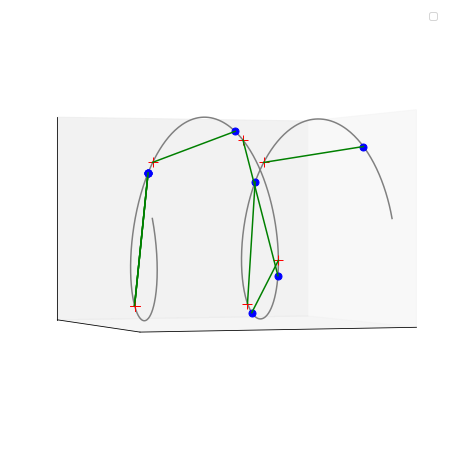

In [15]:
n_points_first_third = len(x) // 3

# Plot the 3D spiral with adjusted viewing angle
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, 'gray')

#ax.plot(x, y, z, label='3D Spiral')
ax.view_init(elev=0, azim=70)  # Adjust the viewing angle
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_zlabel('')


for i in range(9):#range(len(points[0])):
    # Extract the x, y, z coordinates for the two points in the pair
    
    start_x = src[i][0] 
    end_x = tgt[i][0]
    start_y = src[i][1]
    end_y = tgt[i][1]
    start_z = src[i][2]
    end_z = tgt[i][2]

    ax.plot([start_x], [start_y], [start_z], 'r+', markersize=10)
    
    # Plot a circle at the ending point
    ax.plot([end_x], [end_y], [end_z], 'bo', markersize=7)

    # Plot a line between the two points
    ax.plot([start_x, end_x], [start_y, end_y], [start_z, end_z], 'green')
    